In [1]:
import numpy as np
from scipy import stats
from scipy.stats import nbinom
import matplotlib.pyplot as plt

In [2]:
# Parameters

# The number of oversea cases
OVERSEA_CASES = 8
# The daily number of international travellers out of WuHan's TianHe airport
# value of 3301 taken from Imperials's report
DAILY_OUTBOUND = 3301
# Catchement size of TienHe airport
# In other words how many people does the airport serve
# or the population of WuHan
# 11.08 million from 2018 official statistics, used by HKU
# CATCHEMENT = 11_080_000
# 19 million estimated population of WuHan metropolitan area, used by Imperial
CATCHEMENT = 19_000_000
# Detection window, how long from infection to hospitalized
# estimated incubation period of 6 days + 4 days of travelling =
DETECTION_WINDOW = 10

In [3]:
# probability that a random person in WuHan travels international on a given day
daily_international_probability = DAILY_OUTBOUND / CATCHEMENT
# probaility an infected person travels internationally while infected (before hospitalized)
p = daily_international_probability * DETECTION_WINDOW
k = OVERSEA_CASES

In [4]:
print("native estimate: %i" % (OVERSEA_CASES / p))

native estimate: 4604


In [5]:
# we can model the total number of cases in wuhan
# as a negative binomial distribution in terms of oversea cases
# see Imperial's report for more
mean, var, skew, kurt = nbinom.stats(k, p, moments='mvsk')
print("mean: %i" % mean)

mean: 4596


In [6]:
# 95% confidence interval
min_x, max_x = nbinom.interval(0.95, k, p)
print("95% CI: {:0.0f} - {:0.0f}".format(min_x, max_x))

95% CI: 1982 - 8290


In [7]:
# we're only interested in the 95% CI, and only graph this range
x = np.arange(min_x, max_x)

In [8]:
# find the mode
mode = max(x, key=lambda x: nbinom.pmf(x, k, p))
print("mode:", mode)

mode: 4022.0


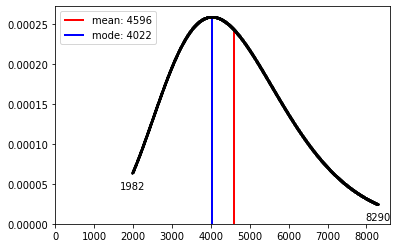

In [9]:
# graph and save the plot
fig, ax = plt.subplots(1, 1)
ax.plot(x, nbinom.pmf(x, k, p), 'ko', ms=1)
ax.vlines(mean, 0, nbinom.pmf(int(mean), k, p),
          color='r', lw=2, label='mean: %i' % mean)
ax.vlines(mode, 0, nbinom.pmf(int(mode), k, p),
          color='b', lw=2, label='mode: %i' % mode)
ax.annotate("%i" % min_x, xy=(min_x, nbinom.pmf(
    int(min_x), k, p)-.00001), ha='center', va='top')
ax.annotate("%i" % max_x, xy=(
    max_x, nbinom.pmf(int(max_x), k, p)-.00001), ha='center', va='top')

# add info to legend if you wish
# ax.vlines([], 0, 0, alpha=0, label="oversea cases: %i" % OVERSEA_CASES)
# ax.vlines([], 0, 0, alpha=0, label="daily outbound: %i" % DAILY_OUTBOUND)
# ax.vlines([], 0, 0, alpha=0, label=f"population: {CATCHEMENT:,}")
# ax.vlines([], 0, 0, alpha=0, label="detection window: %i" % DETECTION_WINDOW)

ax.legend(loc='upper left')
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.savefig("pic.png")
plt.show()